In [ ]:
!pip install tensorflow
!pip install matplotlib

import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_data_dir = '/content/drive/MyDrive/archive (1)/train'
test_data_dir ='/content/drive/MyDrive/archive (1)/test'

img_size = (48, 48)
batch_size = 25


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [12]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Load data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Assuming you have a validation split
)

# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')

# Load training data and perform oversampling
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Set the number of samples
num_samples = train_generator.samples

# Create an array of indices for oversampling
indices = np.arange(num_samples).reshape(-1, 1)

# Oversample the data
X_resampled, y_resampled = oversample.fit_resample(indices, train_generator.classes)

# Generate augmented data
X_resampled_images = []
y_resampled_images = []

for index in X_resampled.flatten():
    img, label = train_generator.next()
    X_resampled_images.append(img[0])
    y_resampled_images.append(label[0])

X_resampled_images = np.array(X_resampled_images)
y_resampled_images = np.array(y_resampled_images)

# Create a new data generator for the oversampled data
train_generator_resampled = train_datagen.flow(
    X_resampled_images,
    y_resampled_images,
    batch_size=batch_size
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2039 images belonging to 2 classes.
Found 509 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [15]:
import keras
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam

# Define image size
img_size = (224, 224)  # Example image size, modify as needed

# Load the pre-trained DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))  # Second dense layer
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))   # Third dense layer
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))   # Fourth dense layer
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


29084464/29084464 [==============================] - 0s 0us/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_5 (Dense)             (None, 256)               262400    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                      

In [16]:

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

# Evaluating on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Epoch 1/30
82/82 [==============================] - 41s 395ms/step - loss: 0.8625 - accuracy: 0.5135 - val_loss: 0.6893 - val_accuracy: 0.5246
Epoch 2/30
82/82 [==============================] - 33s 401ms/step - loss: 0.7097 - accuracy: 0.5390 - val_loss: 0.6873 - val_accuracy: 0.5619
Epoch 3/30
82/82 [==============================] - 32s 389ms/step - loss: 0.6823 - accuracy: 0.5817 - val_loss: 0.6588 - val_accuracy: 0.6228
Epoch 4/30
82/82 [==============================] - 27s 327ms/step - loss: 0.6592 - accuracy: 0.6047 - val_loss: 0.6608 - val_accuracy: 0.6031
Epoch 5/30
82/82 [==============================] - 29s 355ms/step - loss: 0.6318 - accuracy: 0.6312 - val_loss: 0.6500 - val_accuracy: 0.6169
Epoch 6/30
82/82 [==============================] - 33s 404ms/step - loss: 0.6225 - accuracy: 0.6513 - val_loss: 0.6629 - val_accuracy: 0.6130
Epoch 7/30
82/82 [==============================] - 32s 386ms/step - loss: 0.6087 - accuracy: 0.6915 - val_loss: 0.6564 - val_accuracy: 0.6051

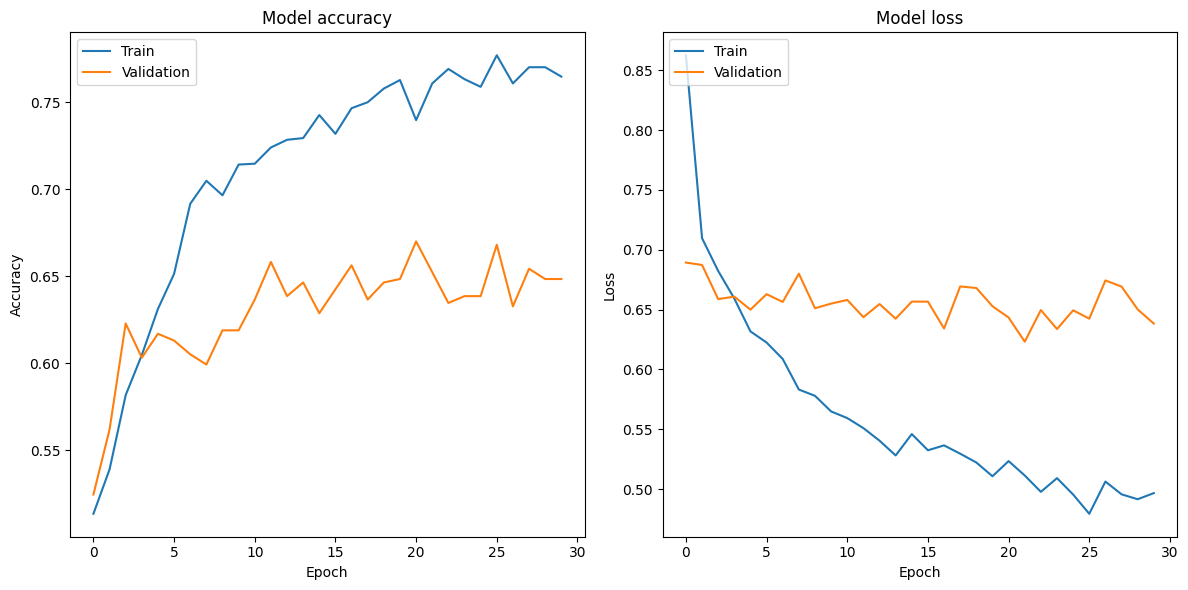

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path
image_path = '/content/drive/MyDrive/archive (1)/test/autistic/003.jpg'

img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

predictions = model.predict(img_array)
#outcome
emotion_labels = ['Surprise', 'Delight', 'Sadness', 'Fear', 'Joy', 'Anger']
predicted_emotion = emotion_labels[np.argmax(predictions)]

# Print the predicted emotion
print(f'The predicted emotion is: {predicted_emotion}')

1/1 [==============================] - 9s 9s/step
The predicted emotion is: Surprise


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculating classification report
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculating F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f'F1 Score: {f1}')

13/13 [==============================] - 3s 234ms/step - loss: 0.5101 - accuracy: 0.7500
Test accuracy: 0.75
13/13 [==============================] - 6s 191ms/step
Accuracy: 0.4383116883116883
Classification Report:
              precision    recall  f1-score   support

    autistic       0.43      0.44      0.43       150
non_autistic       0.45      0.44      0.44       158

    accuracy                           0.44       308
   macro avg       0.44      0.44      0.44       308
weighted avg       0.44      0.44      0.44       308

Confusion Matrix:
[[66 84]
 [89 69]]
F1 Score: 0.43840051151210285
